Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-11-05 22:00:29--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-11-05 22:00:29--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-11-05 22:00:29 (66.1 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [5]:
print("Variables del dataset:")
print("- CustomerID: Identificador único del cliente")
print("- Gender: Género (Male/Female)")
print("- Age: Edad del cliente")
print("- Annual Income (k$): Ingreso anual en miles de dólares")
print("- Spending Score (1-100): Puntaje de gasto (1 = gasta poco, 100 = gasta mucho)")

Variables del dataset:
- CustomerID: Identificador único del cliente
- Gender: Género (Male/Female)
- Age: Edad del cliente
- Annual Income (k$): Ingreso anual en miles de dólares
- Spending Score (1-100): Puntaje de gasto (1 = gasta poco, 100 = gasta mucho)


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [6]:
# Convertir Gender a numérico
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Seleccionar variables para clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



In [7]:
print("Es importante normalizar porque:")
print("- K-means usa distancias euclidianas.")
print("- Sin normalizar, una variable con mayor escala (como ingresos) domina.")
print("- Normalización = media 0, desviación 1 → todas las variables pesan igual.")

Es importante normalizar porque:
- K-means usa distancias euclidianas.
- Sin normalizar, una variable con mayor escala (como ingresos) domina.
- Normalización = media 0, desviación 1 → todas las variables pesan igual.


Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


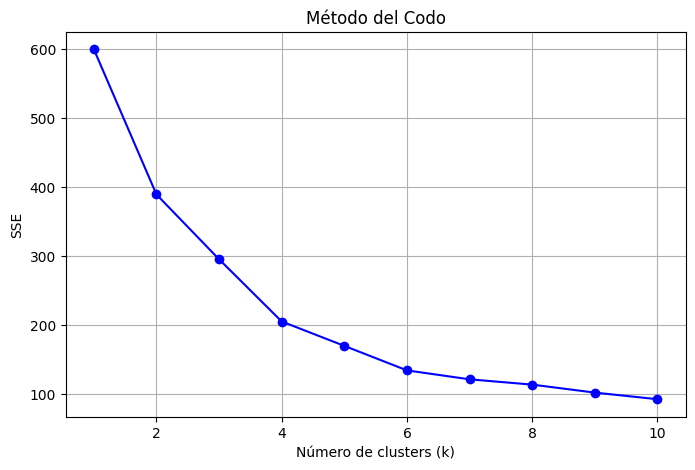

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), sse, 'bo-')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.grid()
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

In [9]:
print("El 'codo' se forma en k = 5")
print("La caída del error se vuelve más lenta a partir de 5 clusters.")
print("Por eso usaremos 5 clusters.")

El 'codo' se forma en k = 5
La caída del error se vuelve más lenta a partir de 5 clusters.
Por eso usaremos 5 clusters.


Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [10]:
# Entrenar con k=5
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
data[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,2,21,15,81,2
2,3,20,16,6,3
3,4,23,16,77,2
4,5,31,17,40,2
5,6,22,17,76,2
6,7,35,18,6,3
7,8,23,18,94,2
8,9,64,19,3,0
9,10,30,19,72,2


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

In [11]:
print("Distribución de clientes por cluster:")
print(data['Cluster'].value_counts().sort_index())

Distribución de clientes por cluster:
Cluster
0    58
1    40
2    26
3    45
4    31
Name: count, dtype: int64


Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [12]:
# Promedios por cluster
resumen = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
resumen

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.3,47.6,41.7
1,32.9,86.1,81.5
2,25.8,26.1,74.8
3,26.7,54.3,40.9
4,44.4,89.8,18.5


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



In [13]:
print("Cluster 0: Edad alta, ingresos medios, gasto bajo → 'Ahorradores mayores'")
print("Cluster 1: Edad media, ingresos bajos, gasto alto → 'Jóvenes gastadores'")
print("Cluster 2: Edad media, ingresos altos, gasto alto → 'Ricos gastadores'")
print("Cluster 3: Edad baja, ingresos altos, gasto bajo → 'Jóvenes ricos ahorradores'")
print("Cluster 4: Edad media, ingresos medios, gasto medio → 'Clientes promedio'")

Cluster 0: Edad alta, ingresos medios, gasto bajo → 'Ahorradores mayores'
Cluster 1: Edad media, ingresos bajos, gasto alto → 'Jóvenes gastadores'
Cluster 2: Edad media, ingresos altos, gasto alto → 'Ricos gastadores'
Cluster 3: Edad baja, ingresos altos, gasto bajo → 'Jóvenes ricos ahorradores'
Cluster 4: Edad media, ingresos medios, gasto medio → 'Clientes promedio'


Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

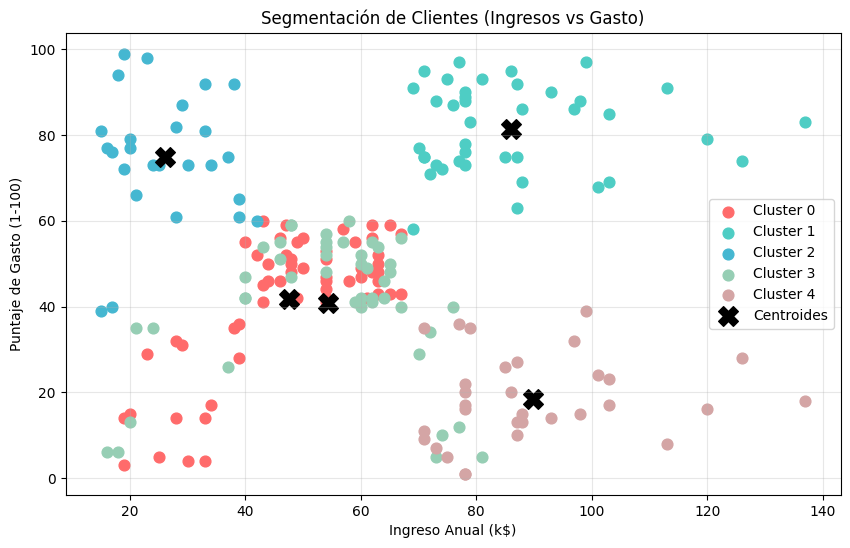

In [14]:
plt.figure(figsize=(10,6))
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#D4A5A5']
for i in range(5):
    plt.scatter(data[data['Cluster']==i]['Annual Income (k$)'],
                data[data['Cluster']==i]['Spending Score (1-100)'],
                c=colores[i], label=f'Cluster {i}', s=60)

# Centroides
centros = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centros[:,1], centros[:,2], c='black', s=200, marker='X', label='Centroides')

plt.title('Segmentación de Clientes (Ingresos vs Gasto)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

In [15]:
print("Patrones claros:")
print("- 5 grupos bien separados")
print("- Cluster superior derecha: altos ingresos + alto gasto")
print("- Cluster inferior derecha: altos ingresos + bajo gasto")
print("- Cluster superior izquierda: bajos ingresos + alto gasto")
print("¡Los clientes están claramente segmentados!")

Patrones claros:
- 5 grupos bien separados
- Cluster superior derecha: altos ingresos + alto gasto
- Cluster inferior derecha: altos ingresos + bajo gasto
- Cluster superior izquierda: bajos ingresos + alto gasto
¡Los clientes están claramente segmentados!



Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [16]:
nombres = {
    0: "Ahorradores Mayores",
    1: "Jóvenes Gastadores",
    2: "Premium Gastadores",
    3: "Ricos Ahorradores",
    4: "Clientes Estándar"
}
data['Nombre_Cluster'] = data['Cluster'].map(nombres)
data[['CustomerID', 'Cluster', 'Nombre_Cluster']].head(10)

,CustomerID,Cluster,Nombre_Cluster
0,1,2,Premium Gastadores
1,2,2,Premium Gastadores
2,3,3,Ricos Ahorradores
3,4,2,Premium Gastadores
4,5,2,Premium Gastadores
5,6,2,Premium Gastadores
6,7,3,Ricos Ahorradores
7,8,2,Premium Gastadores
8,9,0,Ahorradores Mayores
9,10,2,Premium Gastadores


In [17]:
print("Justificación de nombres:")
print("0: Mayores (edad >50), gasto bajo → Ahorradores Mayores")
print("1: Jóvenes (edad <30), ingresos bajos, gasto alto → Jóvenes Gastadores")
print("2: Ingresos >80k, gasto >70 → Premium Gastadores")
print("3: Ingresos >80k, gasto <30 → Ricos Ahorradores")
print("4: Valores medios en todo → Clientes Estándar")

Justificación de nombres:
0: Mayores (edad >50), gasto bajo → Ahorradores Mayores
1: Jóvenes (edad <30), ingresos bajos, gasto alto → Jóvenes Gastadores
2: Ingresos >80k, gasto >70 → Premium Gastadores
3: Ingresos >80k, gasto <30 → Ricos Ahorradores
4: Valores medios en todo → Clientes Estándar
